# Ecommerce Effort Plan Prediction using Regularized Regression

It is all about Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

Melisa Damayanti Feb 2023 Source : Udemy Course

## Imports

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline
%time

CPU times: total: 0 ns
Wall time: 0 ns


In [73]:
customers = pd.read_csv("Ecommerce Customers")

In [74]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [75]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [76]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<AxesSubplot:>

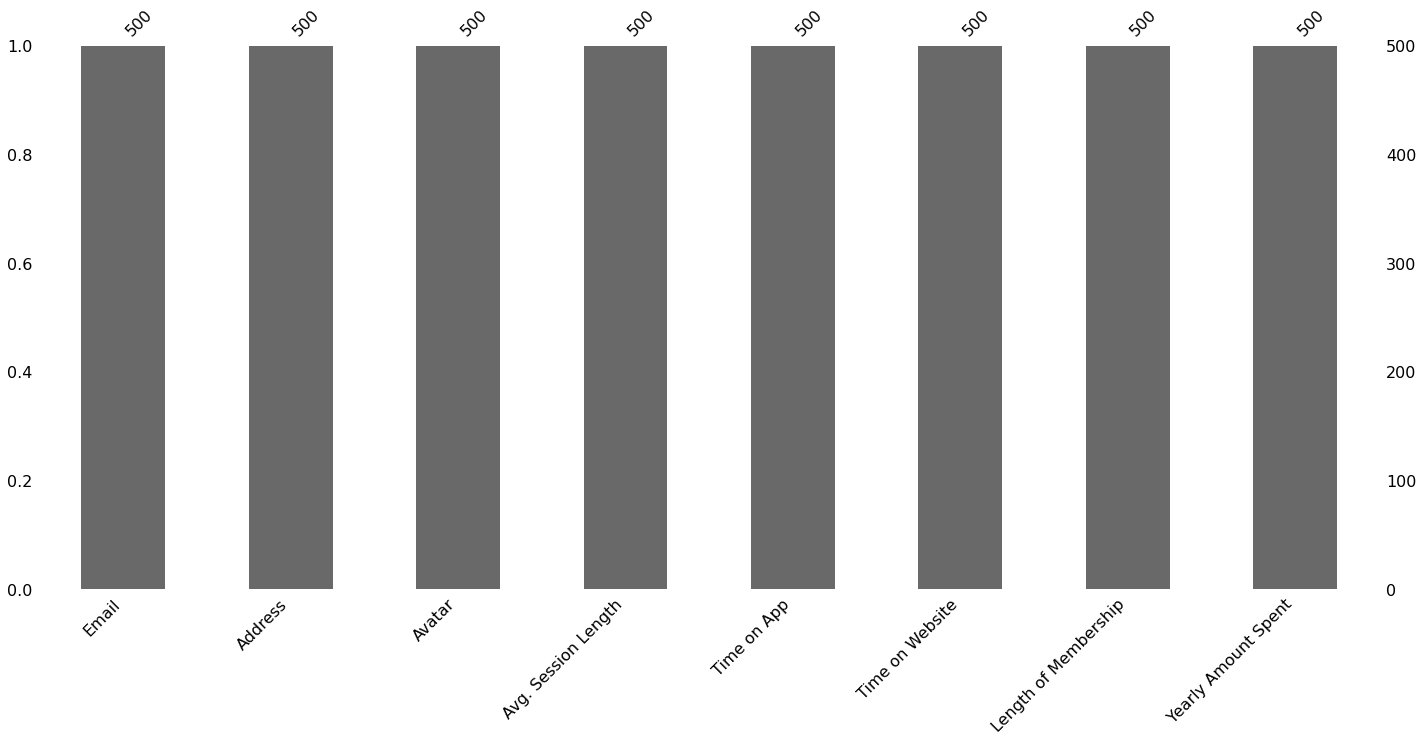

In [77]:
missingno.bar(customers)

In [78]:
customers.duplicated().sum()

0

# Exploratory Data Analysis 

In [79]:
categoricals = ['Email','Address','Avatar']
numericals = ['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
for col in categoricals:
  print(f"Value counts of {col} column")
  print(customers[col].value_counts(), '\n')

Value counts of Email column
kimberly46@garcia-nelson.biz    1
steven00@combs.com              1
langmatthew@hotmail.com         1
mitchellscott@gmail.com         1
taylormason@gmail.com           1
                               ..
lauriewilson@jackson.com        1
stephaniehill@hotmail.com       1
wellsjuan@schroeder.com         1
christopher44@hotmail.com       1
hannahgilbert@gmail.com         1
Name: Email, Length: 500, dtype: int64 

Value counts of Address column
4800 Ashley Spur Apt. 347\nDannyfort, GA 23352                        1
33213 Tanner Knolls Apt. 519\nWhiteborough, OR 37119-7790             1
12641 Greer Track Apt. 183\nNorth Mitchell, IA 77991-6276             1
89301 Kylie Crossroad\nPetersonberg, MH 23834                         1
13164 Miller Camp\nSouth Deannaberg, ID 85433                         1
                                                                     ..
510 Michele Port\nEast Angela, HI 23618                               1
63010 Reyes Creek Apt

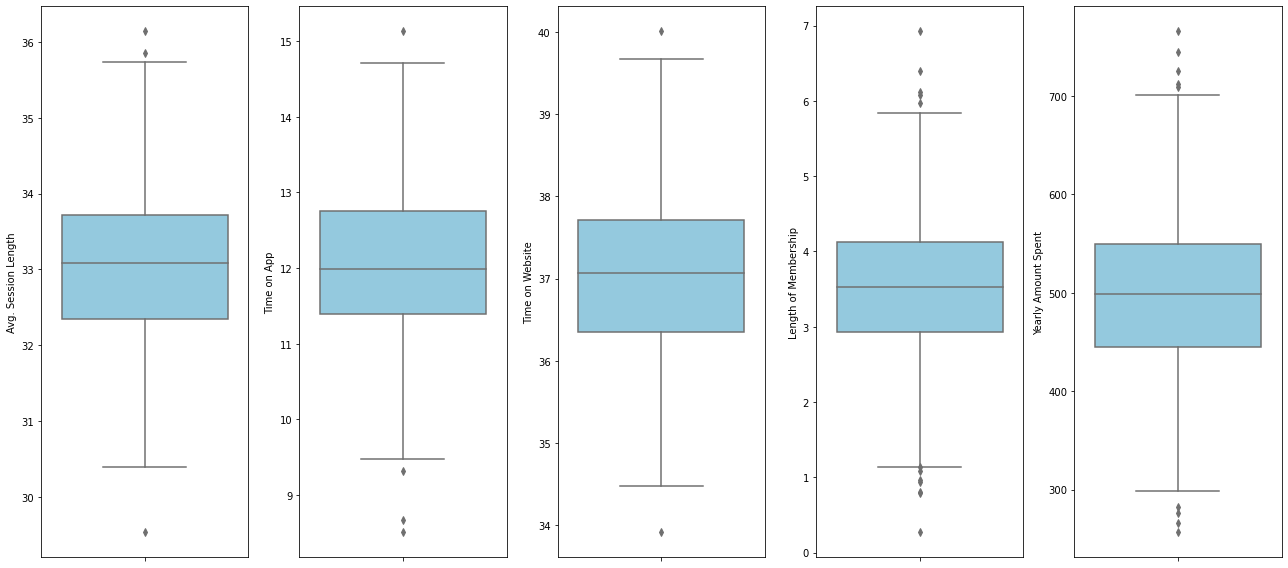

In [80]:
plt.figure(figsize=(18,8))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=customers[features[i]], color='skyblue')
    plt.tight_layout()

C:\Users\Melisa Damayanti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Melisa Damayanti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Melisa Damayanti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

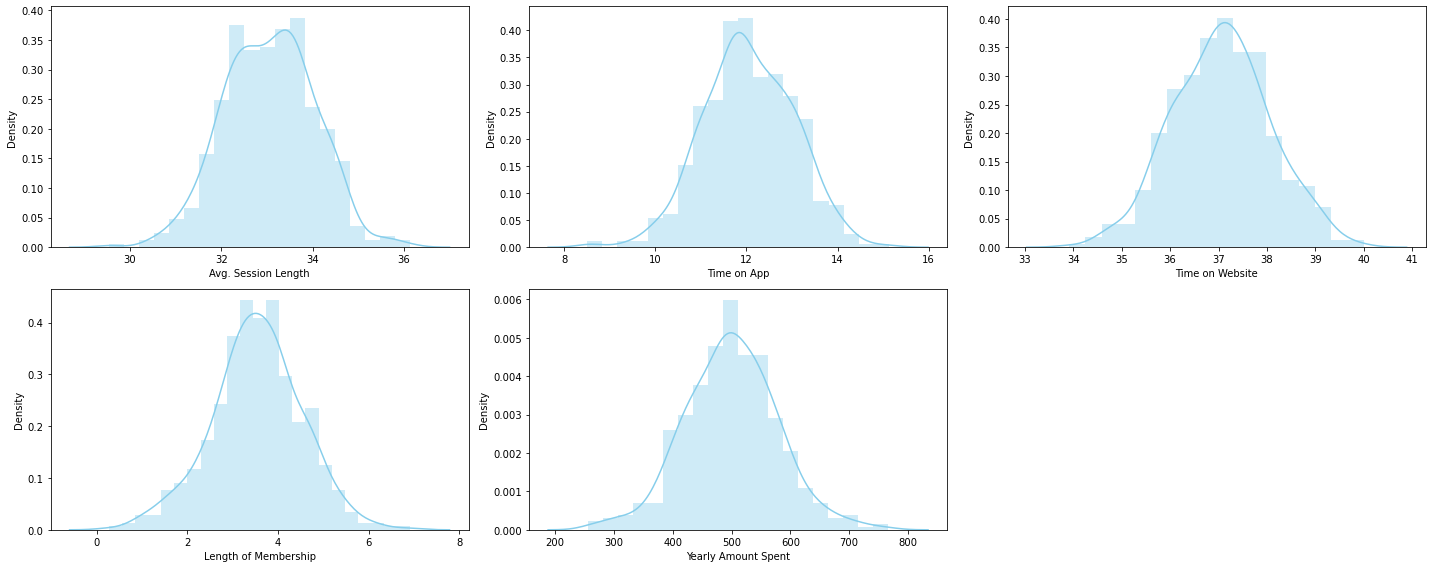

In [81]:
plt.figure(figsize=(20,8))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=customers[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

<AxesSubplot:>

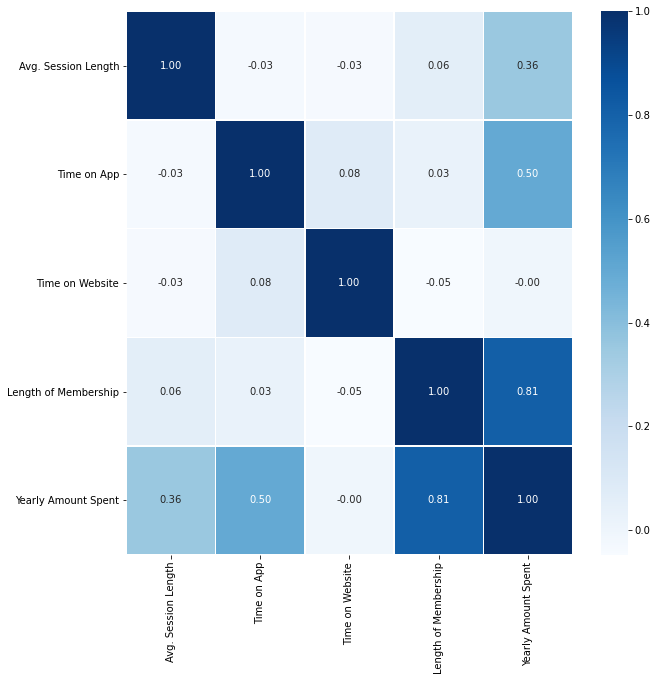

In [82]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
correlation = customers.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', ax=ax, linewidths=.5, cmap ='Blues')

# Train Test Data Splitting

In [83]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Train model Regularized Regression

In [86]:
from sklearn import linear_model
lr = linear_model.Lasso(alpha=.5)
lr.fit(X_train,y_train)

Lasso(alpha=0.5)

In [87]:
lr.coef_

array([25.530269  , 38.16682476,  0.        , 60.97367393])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lr.predict() to predict off the X_test set of the data.**

In [88]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

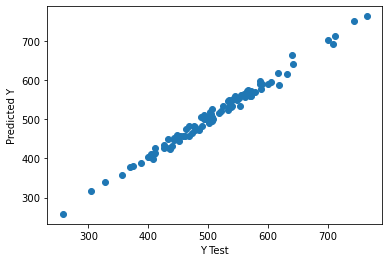

In [89]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [90]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.720336121967005
MSE: 92.19858731060742
RMSE: 9.602009545434091


C:\Users\Melisa Damayanti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


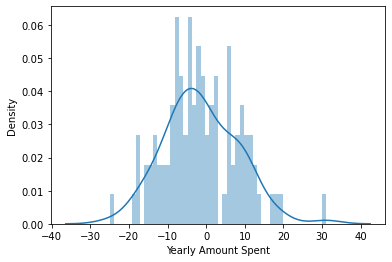

In [91]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [92]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.530269
Time on App,38.166825
Time on Website,0.000000
Length of Membership,60.973674


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.53 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.16 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 60.97 total dollars spent**.

**Which one, Mobile app or Website?**

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!